In [1]:
!pip install sklearn pandas seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from config import GRAVITY, DAMPING_FACTOR

# Load the dataset
data = pd.read_csv('particle_data.csv')

# Add gravity and damping as columns with the vertical component for gravity
data['gravity'] = float(GRAVITY[1])  # Use the vertical component (0.1)
data['damping'] = float(DAMPING_FACTOR)  # Ensure it's a scalar value

data.head()

,time_step,current_x,current_y,current_vx,current_vy,elasticity,next_x,next_y,gravity,damping
0,0,320.0,458.0,-0.664750,0.938314,0.888658,319.341898,459.027931,0.1,0.99
1,0,685.0,471.0,0.489858,-0.211509,0.556559,685.484960,470.889606,0.1,0.99
2,0,84.0,548.0,1.977253,-1.796744,0.511593,85.957480,546.320223,0.1,0.99
3,0,151.0,152.0,0.139237,-1.404116,0.744432,151.137845,150.708925,0.1,0.99
4,0,80.0,54.0,-0.534515,-1.040937,0.994107,79.470830,53.068473,0.1,0.99


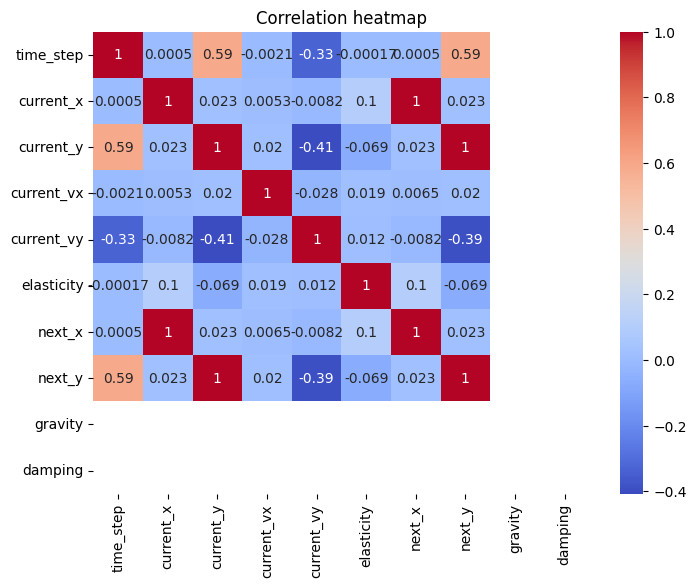

In [27]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [28]:
# Prepare features and target
features = data[['current_x', 'current_y', 'current_vx', 'current_vy', 'elasticity', 'gravity', 'damping']]
target = data[['next_x', 'next_y']]

In [16]:
# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)  # Output layer for next_x and next_y
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2594 (10.13 KB)
Trainable params: 2594 (10.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.4774 - mae: 0.4463 - val_loss: 0.6863 - val_mae: 0.6684
Epoch 2/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.5983 - mae: 0.4373 - val_loss: 0.0468 - val_mae: 0.1335
Epoch 3/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.4582 - mae: 0.4314 - val_loss: 0.0564 - val_mae: 0.1381
Epoch 4/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.5777 - mae: 0.4742 - val_loss: 0.3474 - val_mae: 0.4645
Epoch 5/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.5047 - mae: 0.4530 - val_loss: 0.6096 - val_mae: 0.5990
Epoch 6/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.6055 - mae: 0.4994 - val_loss: 0.2257 - val_mae: 0.3447
Epoch 7/50
1189/1189 [==============================] - 1s 1ms/step - loss: 0.3930 - mae: 0.4356 - val_loss: 0.5639 - val_mae: 0.5842
Epoch 8/50
1189/1189 [==============================] - 1s 1ms

In [23]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test MAE: {test_mae}')

93/93 - 0s - loss: 1.3081 - mae: 0.7549 - 93ms/epoch - 1ms/step
Test MAE: 0.7548702955245972


In [24]:
predictions = model.predict(X_test)
print('Predictions:\n', predictions)
print('Actual:\n', y_test.values)

93/93 [==============================] - 0s 1ms/step
Predictions:
 [[432.03183  591.2143  ]
 [253.42407  595.269   ]
 [517.98486  594.6259  ]
 ...
 [415.40402  590.13885 ]
 [471.22998  594.78284 ]
 [ 45.404392 421.67557 ]]
Actual:
 [[431.65685095 593.67345907]
 [253.70303538 595.        ]
 [518.40469285 595.        ]
 ...
 [415.69557318 591.20816265]
 [472.09611141 595.        ]
 [ 44.42511816 424.7210712 ]]


In [25]:
# Save the entire model as a HDF5 file
model.save('nn_model.h5')

c:\Users\Administrateur\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
